# Imports:

In [1]:
from math import pi, sin, cos
from typing import Sequence
import matplotlib.pyplot as plt
import numpy as np

# Classes:

In [2]:
class Object:
            """
            the class to create and handle fractal Objects

            methods:

            shift:
                the function to apply the shift on the object
            scale:
                the function to apply the scaling on the object
            rotate:
                the function to apply the rotation on the object
            copy:
                creates a new object with the same values for attributes

            doColor:

            getPlot:
            """

            def __init__(self, startingPoint: Sequence[float], endPoint: Sequence[float]) -> None:
                """
                the function to create the fractal objects
                the init color is blue

                :param startingPoint:the starting point of the object stored as np.array
                :type startingPoint:Sequence[float]
                :param endPoint:the endPoint of the object stored as np.array
                :type endPoint:Sequence[float]
                """
                self.color = "blue"
                self.startingPoint = np.array(startingPoint)
                self.endPoint = np.array(endPoint)

            def copy(self) -> object:
                """
                the function to create a new object with the same properties as the input object

                :return:the new object
                :rtype:object
                """
                return Object(self.startingPoint.copy(),self.endPoint.copy())


            def scale(self, r: float) -> object:
                """
                the function to apply the scaling on the object

                :param r:the scaling coefficient
                :type r: float
                :return:the exact object
                :rtype:object
                """
                self.startingPoint *= r
                self.endPoint *= r
                return self

            def shift(self,shiftParams:np.array) -> object:
                """
                the function to apply the shift on the object
                R is the rotating matrix witch should be applied on the shift vector

                :param shiftParams:(the shift vector /length of object)
                :type shiftParams:np.array
                :return:the exact object
                :rtype:object
                """
                self.startingPoint -= shiftParams
                self.endPoint -= shiftParams
                return self

            def rotate(self, rotatingParam: float) -> object:
                """
                the function to apply the rotation on the object
                R is the rotating matrix

                :param rotatingParam: the change of theta
                :type rotatingParam: float
                :return:the exact object
                :rtype:object
                """
                R = np.array([[cos(rotatingParam),-sin(rotatingParam)],[sin(rotatingParam),cos(rotatingParam)]])
                self.startingPoint = R.dot(self.startingPoint)
                self.endPoint = R.dot(self.endPoint)
                return self

            def doColor(self, colorParam: str) -> object:
                """
                the function to apply coloring on the object

                :param colorParam:
                :type colorParam:
                :return:the exact object
                :rtype:object
                """
                self.color = colorParam
                return self


            def getPlot(self) -> plt.plot:
                """
                the function to get the plot of the object

                :return:the plot of the object
                :rtype:plt.plot
                """
                return plt.plot([self.startingPoint[0],self.endPoint[0]],[self.startingPoint[1],self.endPoint[1]],color=self.color)


In [3]:
class Transformer:
    """
    the class to create and perform transformers

    methods:
    subTransform:
        to apply all changes of a transformer on an object and return aa new object
    """
    def __init__(self, scaleParam: float, rotateParam: float, colorParam: str,shiftParams:Sequence[float]) -> None:
        """
        creates transformers based on the params

        :param scaleParam:the scale coefficient of transformer
        :type scaleParam: float
        :param shiftParams:the shift vector of the transformer
        :type shiftParams: np.array
        :param rotateParam:the change of theta witch the transformer applies
        :type rotateParam: float
        """
        self.scaleParam =scaleParam
        self.rotateParam = rotateParam
        self.colorParam = colorParam
        self.shiftParams = np.array(shiftParams)

    def subTransform(self, obj: object) -> object:
        """
        to apply all changes of a transformer on an object and return aa new object
        the sort of the changes is important.

        :param obj:the first object
        :type obj: object
        :return: new object
        :rtype: object
        """
        return obj.copy().scale(self.scaleParam).rotate(self.rotateParam).doColor(self.colorParam).shift(self.shiftParams)

In [4]:
class Dragon:
    """
    the class to create Dragon highway object and simulate the fractal growth

    methods:
        visualize:
            the function to create a plotly plot of the objects at the step
        transform:
            the function to apply all the transformers on the input object
        step:
            the function to go one step forward
    """
    def __init__(self, firstObject: object, transformers: Sequence[Transformer]) -> None:
        """
        the function to create the Dragon object with the first object and the transformers

        :param firstObject:the first input
        :type firstObject:object
        :param transformers:the transformers to apply on the objects
        :type transformers:Transformer
        """
        self.objects:np.array = [firstObject]
        self.transformers = transformers

    def visualize(self) -> None:
        """
        the function to create a plotly plot of the objects at the step
        """
        plots = []
        for obj in self.objects:
             plots.append(obj.getPlot())


        plt.show(plots)
    def transform(self, obj: object) -> Sequence[object]:
        """
        the function to apply all the transformers on the input object

        :param obj:the input object
        :type obj:object
        :return:the new output objects
        :rtype:Sequence[object]
        """
        outputs = []
        for transformer in self.transformers:
            outputs.append(transformer.subTransform(obj))

        return outputs

    def step(self) -> None:
        """
        the function to go one step forward
        """
        new_objects = []
        for obj in self.objects:
            new_objects += self.transform(obj)

        self.objects = new_objects


# Main Part:

### creating the first object,the transformers and the dragon object based on the first object and the transformer

In [7]:
firstObject = Object([0.,0.],[-1.,0.])
transformer1 = Transformer(sin(pi/4),-pi/4,"blue",[0.5,0.5])
transformer2 = Transformer(sin(pi/4),-3*pi/4,"red",[0.5,0.5])
dragonObject = Dragon(firstObject,[transformer1,transformer2])

### the change loop and visualization

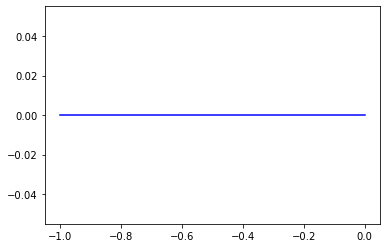

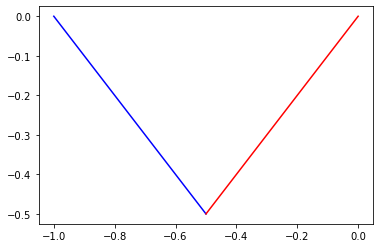

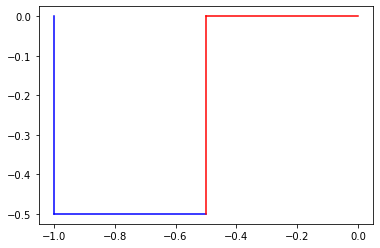

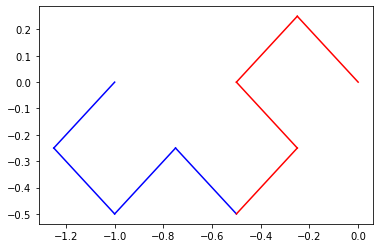

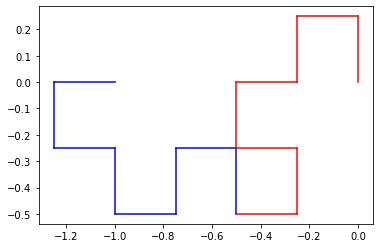

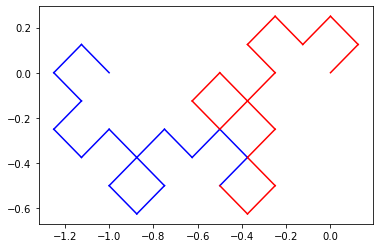

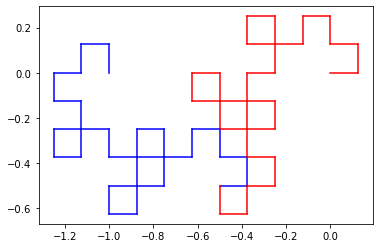

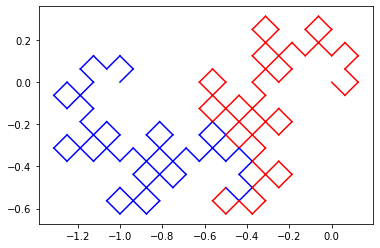

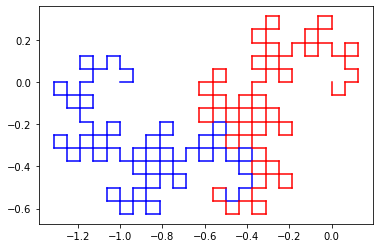

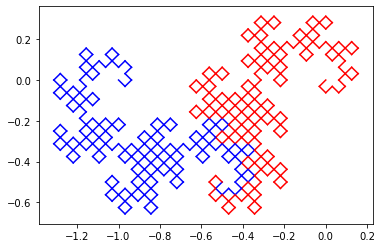

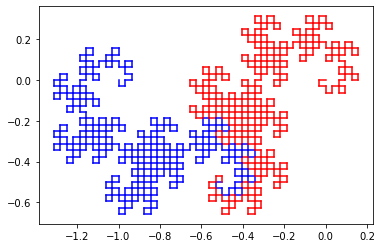

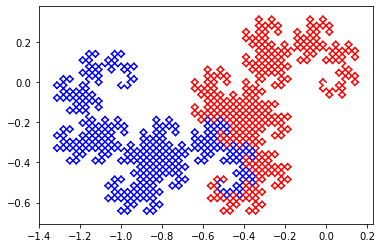

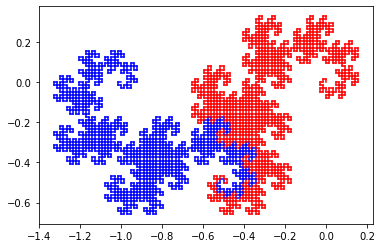

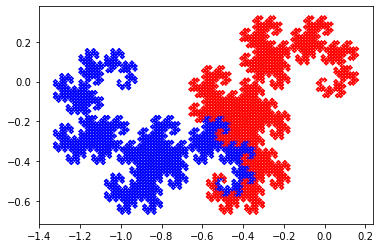

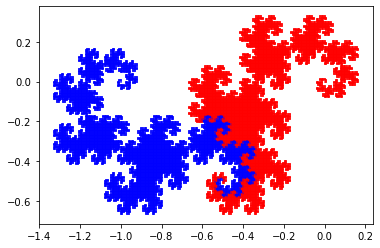

In [8]:
for i in range(15):
    dragonObject.visualize()
    dragonObject.step()